In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv("SaberPro.csv", sep=";")
print(datos.columns)

Index(['ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO',
       'ESTU_EXTERIOR', 'PERIODO', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_AREARESIDE',
       'ESTU_COLE_TERMINO', 'ESTU_OTROCOLE_TERMINO',
       'ESTU_CODDANE_COLE_TERMINO', 'ESTU_COD_COLE_MCPIO_TERMINO',
       'ESTU_COMOCAPACITOEXAMENSB11', 'ESTU_TIPODOCUMENTOSB11',
       'ESTU_SEMESTRECURSA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS',
       'FAMI_TIENESERVICIOTV', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA',
       'FAMI_TIENECONSOLAVIDEOJUEGOS', 'INST_NOMBRE_INSTITUCION',
       'ESTU_PRGM_ACADEMICO', 'ESTU_NUCLEO_PREGRADO',
       'INST_CARACTER_ACADEMICO', 'INST_ORIGEN', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION',
       'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_RAZONA_CUANTITAT_DESEM',
       'MOD_RAZONA_CUANTITATIVO_PNAL', 'MOD_RAZONA_CUANTITATI

In [3]:
puntXdepto = datos[["ESTU_DEPTO_RESIDE", "PUNT_GLOBAL"]]
puntXdepto = puntXdepto[puntXdepto["PUNT_GLOBAL"] != 0]
puntXdepto = puntXdepto.groupby(["ESTU_DEPTO_RESIDE"])["PUNT_GLOBAL"].mean()
print(puntXdepto)

ESTU_DEPTO_RESIDE
AMAZONAS           133.858974
ANTIOQUIA          150.419721
ARAUCA             132.855738
ATLANTICO          145.085777
BOGOTÇ            154.101296
BOLIVAR            140.499185
BOYACA             147.742612
CALDAS             147.364656
CAQUETA            134.159744
CASANARE           137.174764
CAUCA              140.342504
CESAR              135.988172
CHOCO              118.924740
CORDOBA            135.568906
CUNDINAMARCA       146.763752
EXTRANJERO         151.485437
GUAINIA            130.840909
GUAVIARE           131.574586
HUILA              136.241187
LA GUAJIRA         129.470044
MAGDALENA          139.833022
META               139.987379
NARIÇ?O            138.100385
NORTE SANTANDER    140.182133
PUTUMAYO           129.281596
QUINDIO            144.862870
RISARALDA          146.225255
SAN ANDRES         132.619355
SANTANDER          149.464323
SUCRE              134.758945
TOLIMA             140.004763
VALLE              146.252545
VAUPES             129

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


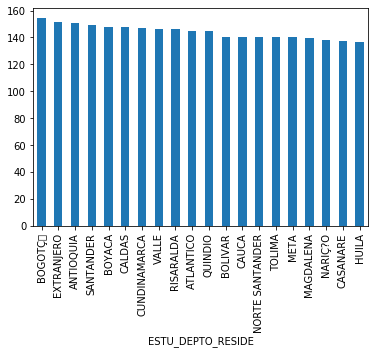

In [4]:
barsdeps = puntXdepto.nlargest(20, "last")
barsdeps.plot.bar()

In [5]:
puntXdepto = puntXdepto.to_frame()
puntXdepto = puntXdepto.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
dataCC = puntXdepto[(puntXdepto["ESTU_DEPTO_RESIDE"] == "CUNDINAMARCA") | (puntXdepto["ESTU_DEPTO_RESIDE"] == "CAQUETA")]

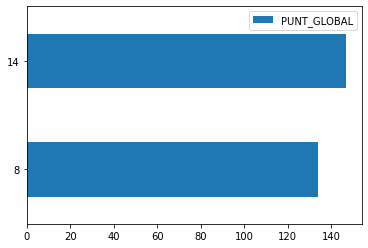

In [6]:
dataCC.plot.barh()

In [7]:
dataCVG = datos[["PUNT_GLOBAL", "FAMI_TIENECONSOLAVIDEOJUEGOS"]]

In [8]:
dataMR = datos[["ESTU_DEPTO_RESIDE", "ESTU_AREARESIDE", "PUNT_GLOBAL"]]
print(dataMR)

       ESTU_DEPTO_RESIDE     ESTU_AREARESIDE  PUNT_GLOBAL
0                  VALLE  Cabecera Municipal          107
1                  VALLE  Cabecera Municipal          144
2                  VALLE  Cabecera Municipal          146
3                  VALLE          Area Rural          130
4                  VALLE  Cabecera Municipal          121
...                  ...                 ...          ...
260678           BOGOTÇ  Cabecera Municipal          183
260679           BOGOTÇ  Cabecera Municipal          223
260680           BOGOTÇ  Cabecera Municipal          170
260681              META          Area Rural          121
260682             CAUCA  Cabecera Municipal          102

[260683 rows x 3 columns]


ESTU_AREARESIDE    Area Rural  Cabecera Municipal
ESTU_DEPTO_RESIDE                                
AMAZONAS           127.300000          134.823529
ANTIOQUIA          142.626232          151.064259
ARAUCA             131.033333          132.711304
ATLANTICO          133.833333          146.549326
BOGOTÇ            142.062025          155.613877
BOLIVAR            131.447423          141.668532
BOYACA             142.483755          148.449457
CALDAS             138.885417          147.953730
CAQUETA            124.988506          134.679104
CASANARE           131.731884          137.644776
CAUCA              134.198565          141.431242
CESAR              127.494118          136.730226
CHOCO              114.228070          119.910784
CORDOBA            131.847074          136.037355
CUNDINAMARCA       143.588913          147.402841
EXTRANJERO         156.500000          140.833333
GUAINIA            123.714286          132.189189
GUAVIARE           118.866667          132.521212


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


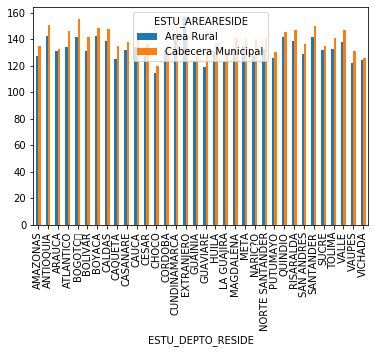

In [9]:
dataMR = pd.pivot_table(datos, values="PUNT_GLOBAL", index=["ESTU_DEPTO_RESIDE"], columns=["ESTU_AREARESIDE"], aggfunc=np.mean)
print(dataMR)
dataMR.plot.bar()